Data Acquisition and Inspection

In [1]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

data = pd.read_csv("Mental_Health_Care_in_the_Last_4_Weeks.csv") ##LOADING THE DATASET
print(data)

                                               Indicator              Group  \
0      Took Prescription Medication for Mental Health...  National Estimate   
1      Took Prescription Medication for Mental Health...             By Age   
2      Took Prescription Medication for Mental Health...             By Age   
3      Took Prescription Medication for Mental Health...             By Age   
4      Took Prescription Medication for Mental Health...             By Age   
...                                                  ...                ...   
10399  Needed Counseling or Therapy But Did Not Get I...           By State   
10400  Needed Counseling or Therapy But Did Not Get I...           By State   
10401  Needed Counseling or Therapy But Did Not Get I...           By State   
10402  Needed Counseling or Therapy But Did Not Get I...           By State   
10403  Needed Counseling or Therapy But Did Not Get I...           By State   

               State       Subgroup Phase  Time Per

In [7]:
print(data.head()) ##PRINTING THE FIRST FEW ROWS
print(data.info()) ##INFO ABOUT COLUMNS AND THEIR TYPES
print(data.describe()) ##SUMMARIZES THE DATA IN THE CSV FILE

                                           Indicator              Group  \
0  Took Prescription Medication for Mental Health...  National Estimate   
1  Took Prescription Medication for Mental Health...             By Age   
2  Took Prescription Medication for Mental Health...             By Age   
3  Took Prescription Medication for Mental Health...             By Age   
4  Took Prescription Medication for Mental Health...             By Age   

           State       Subgroup Phase  Time Period      Time Period Label  \
0  United States  United States     2           13  Aug 19 - Aug 31, 2020   
1  United States  18 - 29 years     2           13  Aug 19 - Aug 31, 2020   
2  United States  30 - 39 years     2           13  Aug 19 - Aug 31, 2020   
3  United States  40 - 49 years     2           13  Aug 19 - Aug 31, 2020   
4  United States  50 - 59 years     2           13  Aug 19 - Aug 31, 2020   

  Time Period Start Date Time Period End Date  Value  LowCI  HighCI  \
0             0

Data Cleaning and Preparation

In [10]:
data = data.drop(columns=['Suppression Flag']) ##DROPPING THIS COLUMN AS IT HAS THE MOST NULL/MISSING VALUES
print(data)

                                               Indicator              Group  \
0      Took Prescription Medication for Mental Health...  National Estimate   
1      Took Prescription Medication for Mental Health...             By Age   
2      Took Prescription Medication for Mental Health...             By Age   
3      Took Prescription Medication for Mental Health...             By Age   
4      Took Prescription Medication for Mental Health...             By Age   
...                                                  ...                ...   
10399  Needed Counseling or Therapy But Did Not Get I...           By State   
10400  Needed Counseling or Therapy But Did Not Get I...           By State   
10401  Needed Counseling or Therapy But Did Not Get I...           By State   
10402  Needed Counseling or Therapy But Did Not Get I...           By State   
10403  Needed Counseling or Therapy But Did Not Get I...           By State   

               State       Subgroup Phase  Time Per

In [12]:
import warnings
warnings.filterwarnings('ignore')
for col in ['Group', 'Subgroup']:
    data[col].fillna("Unknown", inplace=True) ##IMPUTING MISSING CATEGORICAL VALUES

encoded_data = pd.get_dummies(data[['Group', 'Subgroup']], drop_first=False) ##ENCODE CATEGORICAL VALUES USING ONE-HOT ENCODING
data = pd.concat([data, encoded_data], axis=1) 

print(data)

                                               Indicator              Group  \
0      Took Prescription Medication for Mental Health...  National Estimate   
1      Took Prescription Medication for Mental Health...             By Age   
2      Took Prescription Medication for Mental Health...             By Age   
3      Took Prescription Medication for Mental Health...             By Age   
4      Took Prescription Medication for Mental Health...             By Age   
...                                                  ...                ...   
10399  Needed Counseling or Therapy But Did Not Get I...           By State   
10400  Needed Counseling or Therapy But Did Not Get I...           By State   
10401  Needed Counseling or Therapy But Did Not Get I...           By State   
10402  Needed Counseling or Therapy But Did Not Get I...           By State   
10403  Needed Counseling or Therapy But Did Not Get I...           By State   

               State       Subgroup Phase  Time Per

In [40]:
print("Missing Values in the Dataset:")
missing_values = data.isnull().sum()
print(missing_values)

Missing Values in the Dataset:
Indicator                      0
Group                          0
State                          0
Subgroup                       0
Phase                          0
                              ..
Subgroup_West Virginia         0
Subgroup_Wisconsin             0
Subgroup_With disability       0
Subgroup_Without disability    0
Subgroup_Wyoming               0
Length: 104, dtype: int64


Exploratory Data Analysis (EDA) with a Focus on Static Visualization

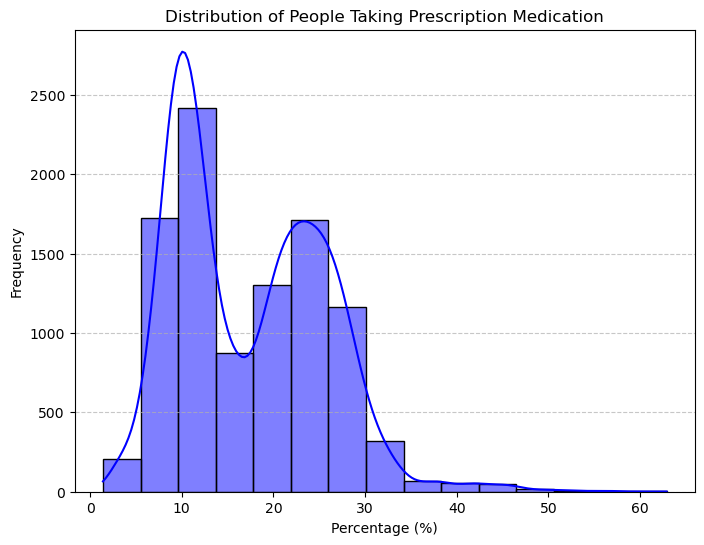

In [19]:
##PERCENTAGE OF PEOPLE TAKING MEDICATION
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.histplot(data['Value'], bins=15, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of People Taking Prescription Medication')
plt.xlabel('Percentage (%)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

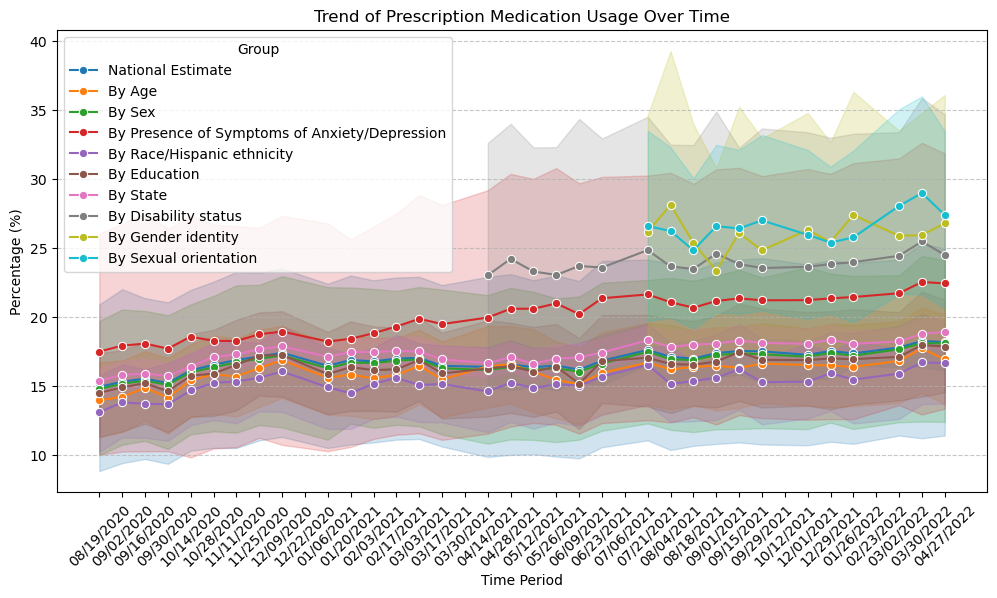

In [21]:
##MEDICATION USAGE OVER TIME
plt.figure(figsize=(12,6))
sns.lineplot(data=data, x='Time Period Start Date', y='Value', hue='Group', marker='o')
plt.title('Trend of Prescription Medication Usage Over Time')
plt.xlabel('Time Period')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

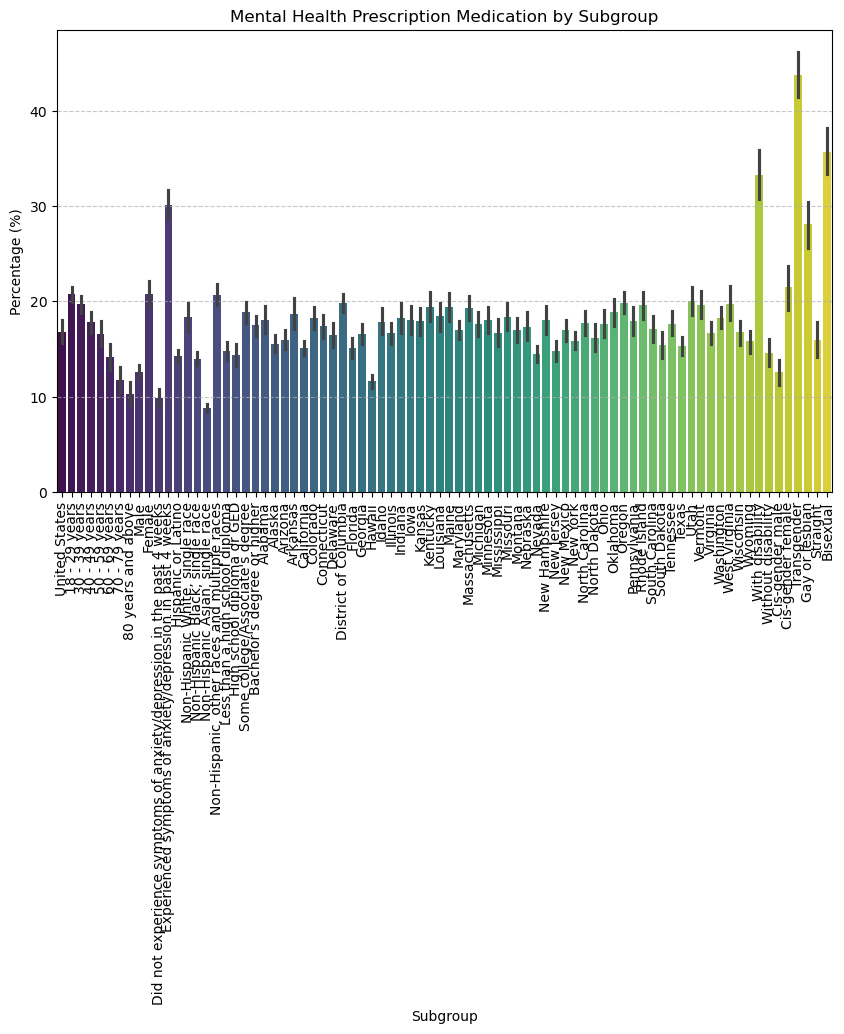

In [23]:
##MEDICATION USAGE BY SUBGROUP
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='Subgroup', y='Value', palette='viridis')
plt.title('Mental Health Prescription Medication by Subgroup')
plt.xticks(rotation=90)
plt.ylabel('Percentage (%)')
plt.xlabel('Subgroup')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Advanced Analysis

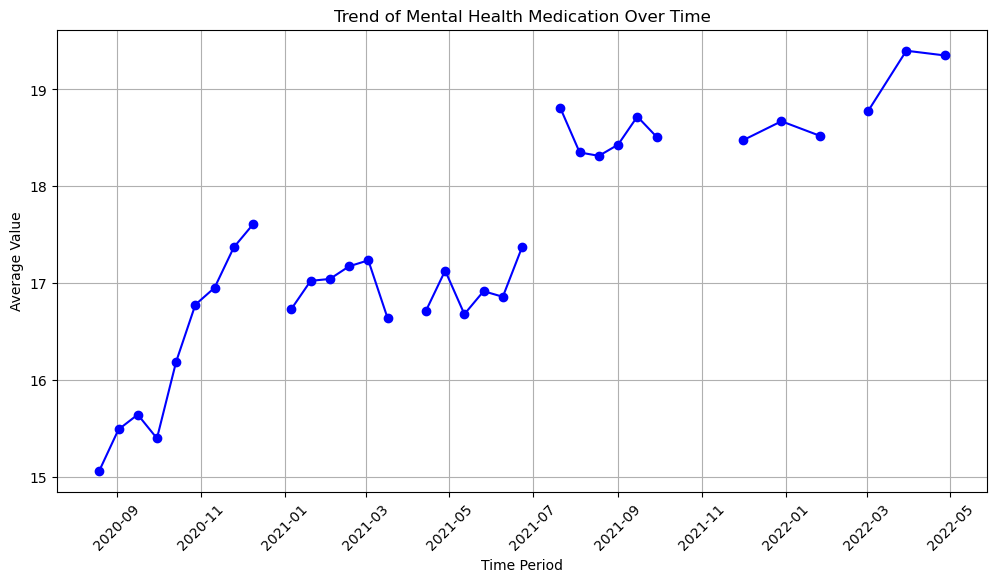

In [26]:
## TIME SERIES ANALYSIS
import pandas as pd

data['Time Period Start Date'] = pd.to_datetime(data['Time Period Start Date']) 
time_series = data.groupby('Time Period Start Date')['Value'].mean()

plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series.values, marker='o', linestyle='-', color='b')
plt.title('Trend of Mental Health Medication Over Time')
plt.xlabel('Time Period')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


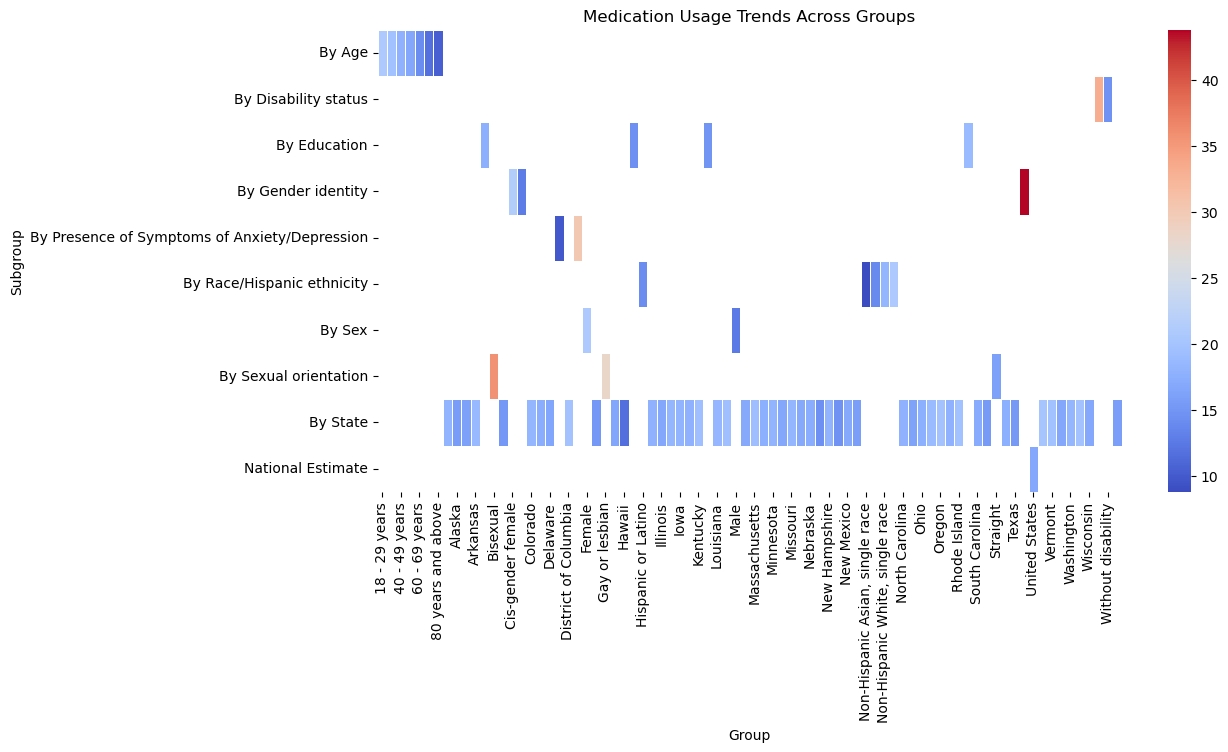

In [36]:
pivot_data = data.pivot_table(index='Subgroup', columns='Group', values='Value', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data.T, cmap="coolwarm", annot=False, fmt=".1f", linewidths=0.5)
plt.title("Medication Usage Trends Across Groups")
plt.xlabel("Group")
plt.ylabel("Subgroup")
plt.xticks(rotation=90)
plt.show()